In [2]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col = 0)

In [4]:
data.head(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


#### 1 Calcula las siguientes estadísticas descriptivas para las variables numéricas:

    Media
    Mediana
    Desviación estándar
    Mínimo
    Máximo

In [5]:
#Sacar las variables numéricas

var_numericas = data.select_dtypes(include=['int', 'float'])

var_numericas



,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,60.0,58.1,652.230,323.0,32.49,93.0,8.672,149.90,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953
1,105.0,43.1,28.748,9.0,11.78,355.0,4.536,119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331
2,18.0,17.4,NaN,317.0,24.28,213.0,150.006,151.36,2.0,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626
3,164.0,40.0,468.000,NaN,7.20,376.0,469.000,NaN,NaN,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801
4,26.0,47.5,NaN,117.0,40.73,244.0,34.693,261.73,17.1,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,912.050,343.0,17.88,58.0,164.175,NaN,254.9,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,72.1,125.0,0.01,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730
191,314.0,39.3,331.210,522.0,16.75,84.0,192.668,163.52,2.8,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,75.3,43.0,0.73,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199
192,56.0,44.6,527.968,40.0,30.45,967.0,10.609,157.58,8.1,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,66.1,164.0,NaN,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388
193,25.0,32.1,752.618,16.0,36.19,260.0,5.141,212.31,9.2,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,63.5,213.0,0.24,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332


In [6]:
for column in var_numericas.columns:

    media = var_numericas[column].mean()
    mediana =var_numericas[column].median()
    var = var_numericas[column].std()
    maximo = var_numericas[column].max()
    minimo = var_numericas[column].min()
    
    print(f'"{column} Media: {media}')
    print(f'{column} Mediana: {mediana}')
    print(f'{column} Max: {maximo}')
    print(f'{column} Min: {minimo}')
    print("--------------")

"density Media: 134.5045333333333
density Mediana: 83.0
density Max: 847.0
density Min: 1.265
--------------
"agricultural_land Media: 39.11755319148937
agricultural_land Mediana: 39.6
agricultural_land Max: 82.6
agricultural_land Min: 0.6
--------------
"land_area Media: 255.21266060606064
land_area Mediana: 148.46
land_area Max: 964.0
land_area Min: 0.0
--------------
"armed_forces_size Media: 103.78313253012048
armed_forces_size Mediana: 28.5
armed_forces_size Max: 936.0
armed_forces_size Min: 0.0
--------------
"birth_rate Media: 20.21497354497354
birth_rate Mediana: 17.95
birth_rate Max: 46.08
birth_rate Min: 5.9
--------------
"calling_code Media: 360.54639175257734
calling_code Mediana: 255.5
calling_code Max: 1876.0
calling_code Min: 1.0
--------------
"co2-emissions Media: 125.91546994535527
co2-emissions Mediana: 34.477
co2-emissions Max: 727.973
co2-emissions Min: 1.016
--------------
"cpi Media: 144.19360000000003
cpi Mediana: 124.74
cpi Max: 550.93
cpi Min: 99.03
---------

Calculamos medidas de centralización para las variables numéricas de nuestro DataFrame. En ellas observamos que los datos son dispersos ya que, la diferencia entre la media y la mediana tiene da ser muy diferente. En algunos casos somo "agricultural_land" esto no se cumple, siendo datos concentrados

#### 2 Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [7]:
mayor_densidad = data["density"].max()

menor_poblacion = data["population"].min()

In [8]:
print(f"El país con mayor densidad de población es: {data[data['density'] == mayor_densidad]['country'].values[0]}")

El país con mayor densidad de población es: Palestinian National Authority


In [9]:
print(f" El país con la menor población es : {data[data['population'] == menor_poblacion]['country'].values[0]}")

 El país con la menor población es : Nauru


#### 3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [10]:
promedio_natalidad = data["birth_rate"].mean()

print(f" la tasa promedio de natalidad es: {promedio_natalidad}")


 la tasa promedio de natalidad es: 20.21497354497354


#### 4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [11]:
data.head(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [12]:
pr25 = np.nanpercentile(data["infant_mortality"],25)
pr75 = np.nanpercentile(data["infant_mortality"],75)

print(pr25)
print(pr75)

6.0
32.7


In [13]:
if data['intant_mortality']

SyntaxError: invalid syntax (1471505359.py, line 1)

#### 5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

#### 6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

In [ ]:
sns.histplot(data, x="variable", bins=10, kde=False, color="blue")

In [14]:
data.head(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


#### 7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

#### 8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [19]:
print(f"El porcentaje prmedio de personas que participan en la fuera laboral de todos los países es {round(data['population_labor_force_participation'].mean(), 2)}")

El porcentaje prmedio de personas que participan en la fuera laboral de todos los países es 62.74



#### 9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [20]:
numericas = data.select_dtypes(include=['number'])

In [22]:
correlacion = numericas.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

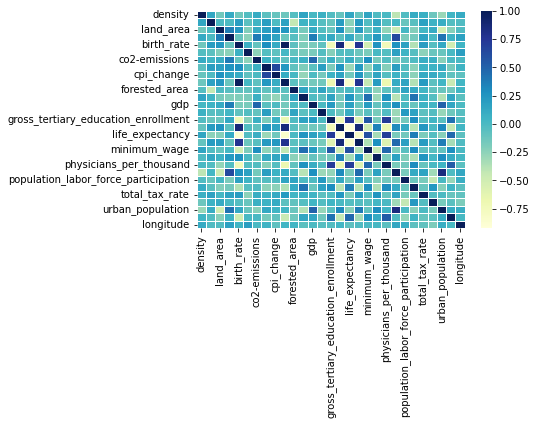

In [26]:
sns.heatmap(correlacion, 
            annot=False, 
            cmap="YlGnBu",
            linewidths=0.5
)
plt.show